In [3]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import decode_predictions
from tensorflow.keras.applications.inception_v3 import preprocess_input

In [5]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os
from os import listdir
from PIL import Image as PImage

In [6]:
img_width, img_height = 299, 299

In [7]:
model_pretrained = InceptionV3(weights = 'imagenet', include_top=True, input_shape = (img_width, img_height, 3))

96124928/96112376 [==============================] - 1s 0us/step


In [10]:
image_path = '/content/drive/MyDrive/Computer Vision/lemon.jpg'
img = image.load_img(image_path, target_size = (img_width, img_height))
image_data = image.img_to_array(img)
image_data = np.expand_dims(image_data, axis = 0)
image_data = preprocess_input(image_data)

In [11]:
img_feature = model_pretrained.predict (image_data)
label = decode_predictions(img_feature)
label

49152/35363 [=========================================] - 0s 0us/step


[[('n07749582', 'lemon', 0.9650635),
  ('n07747607', 'orange', 0.026402561),
  ('n04509417', 'unicycle', 0.00013831952),
  ('n03792782', 'mountain_bike', 5.7088542e-05),
  ('n02396427', 'wild_boar', 5.6330853e-05)]]

In [19]:
label = label[0][0]


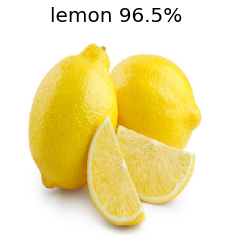

In [20]:
plt.imshow(img)
stringprint = "%.1f" % round(label[2]*100,1)
plt.title(label[1] + " " + str(stringprint) + "%", fontsize = 20 )
plt.axis('off')
plt.show()

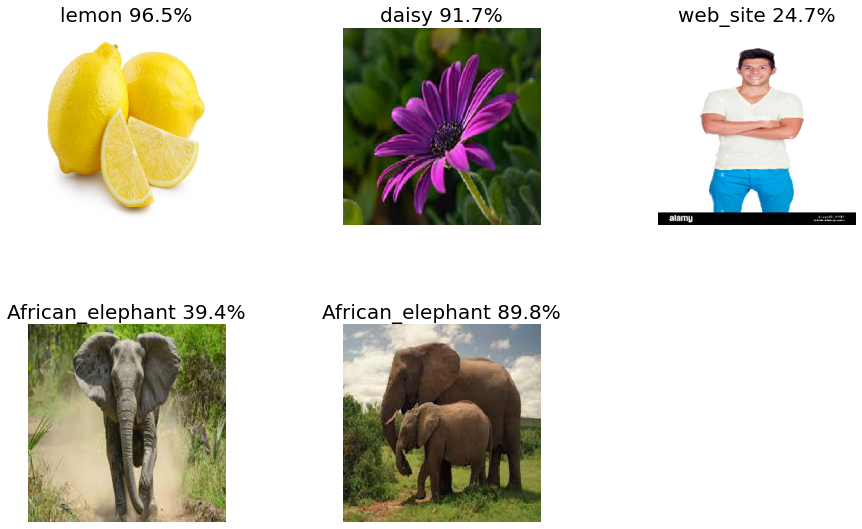

In [22]:
folder_path = '/content/drive/MyDrive/Computer Vision/'
images = os.listdir(folder_path)
images

fig = plt.figure(figsize = (16, 20))

i = 0
rows = 4
columns = 3

for image1 in images:
  i+=1
  img = image.load_img(folder_path + image1, target_size = (img_width, img_height))
  image_data = image.img_to_array(img)
  image_data = np.expand_dims(image_data, axis = 0)
  image_data = preprocess_input(image_data)

  img_feature = model_pretrained.predict(image_data)
  label = decode_predictions(img_feature)
  label = label[0][0]

  fig.add_subplot(rows, columns, i)
  fig.subplots_adjust(hspace = .5)
  plt.imshow(img)  

  stringprint = "%.1f" % round(label[2]*100, 1)
  plt.title(label[1] + " " + str(stringprint) + "%", fontsize = 20)
  plt.axis('off')
plt.show()